# Homework 02:  Working with numbers

In [1]:
# Libraries
import numpy as np
import re

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, IndexLocator

**1**. (10 points) 

Normalize the $3 \times 4$ diagonal matrix with diagonal (1, ,2, 3) so all rows have mean 0 and standard deviation 1. The matrix has 0 everywhere not on the diagonal.

In [2]:
# Initial Matrix
xs = np.fromfunction(lambda i, j: np.where(i==j, i+1, 0), (3,4))
xs

array([[1., 0., 0., 0.],
       [0., 2., 0., 0.],
       [0., 0., 3., 0.]])

In [3]:
# Normalize xs
xs = (xs - xs.mean(axis=1).reshape(-1,1)) / xs.std(axis=1).reshape(-1,1)
xs

array([[ 1.73205081, -0.57735027, -0.57735027, -0.57735027],
       [-0.57735027,  1.73205081, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027,  1.73205081, -0.57735027]])

In [4]:
# Verify results
print(xs.mean(axis=1), "\n", xs.std(axis=1))

[-5.55111512e-17 -5.55111512e-17  0.00000000e+00] 
 [1. 1. 1.]


**2**. (10 points) 

A fixed point of a funciton is a value that remains the same when the funciton is applied to it, that is $f(x) = x$. Write a function that finds the fixed poitn of another function $f$ given an intiial value $x_0$. For example, if

$$f(x) \rightarrow \sqrt{x}$$

and 

$x_0$ is any positive real number, then the function should return 1 since

$$\sqrt{1} = 1$$

Not all funcitons have a fixed point - if it taakes over 1,000 iterations, the fucntion shold return None.

- Use the function signature `fixed_point(f, x0, max_iter=1000)`. 
- Test with `fixed_point(np.sqrt, 10)`.

In [5]:
# Primitive fixed-point finder - this will only find stable fixed points in direction of function
def fixed_point(f, x0, max_iter=1000):
    x = f(x0)
    for i in range(max_iter):
        if f(x) == x:
            return x
        x = f(x)
    return None

In [6]:
# Test
fixed_point(np.sqrt, 10)

1.0

**3**. (10 points) 

Use `np.fromfunction` to construc the following matrix

```python
array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])
```

In [7]:
# Numbers where i==j or i==4-j, take value 5-i
xs = np.fromfunction(lambda i, j: np.where((i==j) | (i==4-j), 5-i, 0), (5,5))
xs

array([[5., 0., 0., 0., 5.],
       [0., 4., 0., 4., 0.],
       [0., 0., 3., 0., 0.],
       [0., 2., 0., 2., 0.],
       [1., 0., 0., 0., 1.]])

**4**. (15 points)

Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment.  What is the most common maximum run length?

Let $n$ = 10,000 and $k=100$.

In [8]:
# Parameters
n = 10**4
k = 10**2

In [9]:
# np.random.choice vectorizes over n and k
draws = np.random.choice(["H", "T"], (n,k))

In [10]:
# Merge each trial into one string, add all H-streaks to one list
maxes = []
for i in ("".join(line) for line in draws):
    streak = re.findall("H+", i)
    maxes.append(max(streak, key=len))

In [11]:
# Make counter, find maximum
count = {}
for i in maxes:
    if i in count:
        count[i] += 1
    else:
        count[i] = 1

In [12]:
# Sorted run lengths
sorted(count.items(), key = lambda x: x[1], reverse=True)

[('HHHHH', 2669),
 ('HHHHHH', 2276),
 ('HHHH', 1527),
 ('HHHHHHH', 1483),
 ('HHHHHHHH', 835),
 ('HHHHHHHHH', 470),
 ('HHH', 270),
 ('HHHHHHHHHH', 236),
 ('HHHHHHHHHHH', 124),
 ('HHHHHHHHHHHH', 58),
 ('HHHHHHHHHHHHH', 24),
 ('HHHHHHHHHHHHHH', 12),
 ('HHHHHHHHHHHHHHHH', 6),
 ('HHHHHHHHHHHHHHH', 4),
 ('HH', 4),
 ('HHHHHHHHHHHHHHHHHH', 2)]

**5**. (15 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [13]:
# Find all primes less than n
def primes(n):
    
    xs = np.arange(n+1)
    ps = np.ones(len(xs)).astype("bool")
    ps[:2] = 0
    p = 2
    
    while p < n:
        
        k = 2 * p
        while k <= n:
            ps[k] = 0
            k += p
        
        p = xs[p+1]
        while ps[p] == 0:
            p += 1
            # Have to check p since outer while loop isn't checked 'til this one's completed
            if p > n:
                break
            
    return xs[ps]

In [14]:
# Test values
n = 10**3
primes(n)

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
       571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
       647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
       739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
       827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
       919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997])

**6**. (40 points)

Write code to generate a plot similar to those shown below using the explanation for generation of 1D Cellular Automata found [here](http://mathworld.wolfram.com/ElementaryCellularAutomaton.html). You should only need to use standard Python, `numpy` and `matplotllib`.

![automata](http://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)



The input to the function making the plots should be a simple list of rules

```python
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 
         150, 158, 182, 188, 190, 220, 222, 250]
make_plots(rules, niter, ncols)
```

You may, of course, write other helper functions to keep your code modular.

In [15]:
# Convert rule number to binary format
def binary(n, width):
    assert(n<2**width)
    x = np.zeros(width)
    
    for i in range(width):
        n, m = divmod(n, 2)
        x[width-i-1] = m
        
    return x

In [16]:
# Convert rule number to rule mapping
def make_map(rule):
    bin_rule = binary(rule, 8)[::-1]
    nums = [tuple(binary(i, 3)) for i in range(8)]
    return dict(zip(nums, bin_rule))

In [17]:
# Apply make_map to convert rule
# init is the configuation (0s/1s) of the top row of the graph
# niters is the height of the graph
def make_ca(rule, init, niters):
    
    # Create mapping from rule number
    mapper = make_map(rule)
    # Make grid of size 2+len(init) so that it can fully populate bottom row
    grid = np.zeros((niters, 2 + len(init)), "int")
    # Set top row of grid to init
    grid[0, 1:-1] = init
    
    for i in range(1, niters):
        # Create zip of 3 adjacent numbers in row above current iteration
        # Note: zip will make appropriate matches despite different lengths
        nums = zip(grid[i-1, 0:], grid[i-1, 1:], grid[i-1, 2:])
        # Convert zip object to new row using mapping rules
        grid[i, 1:-1] = [mapper[nums] for nums in nums]
    
    return grid[:, 1:-1]

In [18]:
# Given helper function to plot grids
def plot_grid(rule, grid, ax=None):
    if ax is None:
        ax = plt.subplot(111)
    # imshow can plot grid of arrays, see matplotlib lecture for more examples
    ax.imshow(grid, interpolation = "none", cmap = "Greys", aspect = 1, alpha = 0.8)
    ax.set_title('Rule %d' % rule)
    
    # Make graphs look like the examples
    ax.grid(True, which='major', color='grey', linewidth=0.5)
    ax.xaxis.set_major_locator(IndexLocator(1, 0))
    ax.yaxis.set_major_locator(IndexLocator(1, 0))
    ax.xaxis.set_major_formatter( NullFormatter() )
    ax.yaxis.set_major_formatter( NullFormatter() )
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

In [19]:
# Function to generate plots
def make_plots(rules, niter, ncols, builder=make_ca):
    width = niter*2 + 1
    init = np.zeros(width, "int")
    init[width//2] = 1
    
    # Plot size
    nrows = (len(rules) + ncols - 1)//ncols
    fig, axes = plt.subplots(nrows, ncols, figsize = (ncols*3, nrows*2))
    
    # Generate plots
    for i in range(nrows):
        for j in range(ncols):
            grid = builder(rules[i*ncols+j], init, niter)
            plot_grid(rules[i*ncols+j], grid, ax=axes[i,j])
    plt.tight_layout()

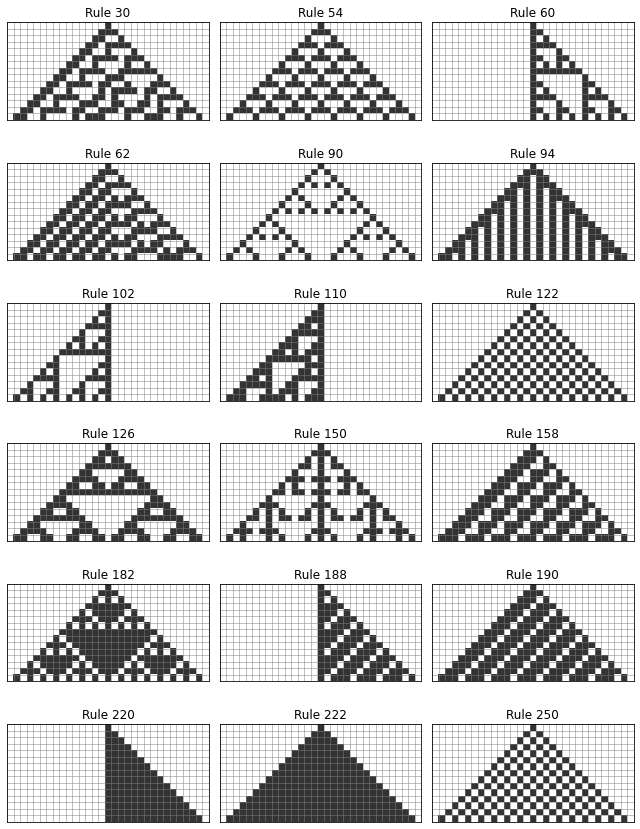

In [20]:
# Test run
rules = [30, 54, 60, 62, 90, 94, 102, 110, 122, 126, 150, 158, 182, 188, 190, 220, 222, 250]
niter = 15
ncols = 3
make_plots(rules, niter, ncols)